In [45]:
# pip install python-louvain
# pip install networkx

In [9]:
import networkx as nx
import networkx.algorithms.community as nxcom
from matplotlib import pyplot as plt
%matplotlib inline
from TwitterAPI import TwitterAPI
import tweepy
from dotenv import dotenv_values

In [10]:
config = dotenv_values('.env')
config = dict(config)
config

{'APIKEY': 'psJAxRJ5knbHWJYjBPOdLiTYW',
 'APIKEYSECRET': 'uIEbmJtaFMq0lXOYqJoCCZdMfRsuuVF18t0gzq2T1Xv5jF30vP',
 'BEARERTOKEN': 'AAAAAAAAAAAAAAAAAAAAAGM8mQEAAAAAGZEaC%2B1mugLiCXNvbUSxiiE2jTY%3DXr5gxEFwIifEDH9tCT7YbSPP5v2JEVmGxA74rcX1pW3ViaApxV',
 'ACCESSTOKEN': '1514498791587876868-kMXd5X8pPrT4zo7J6IMYn0ldaPGSHD',
 'ACCESSTOKENSECRET': 'VWZTd7DZNzPegpJkXzgX74VRecRSLuRr8Ghxp96xW4FH2'}

In [11]:
api_key = config['APIKEY']
api_secrets = config['APIKEYSECRET']
bearer_token = config['BEARERTOKEN']
access_token = config['ACCESSTOKEN']
access_token_secret = config['ACCESSTOKENSECRET']
auth = tweepy.OAuthHandler(api_key,api_secrets)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth)
try:
    api.verify_credentials()
    print('-------------------------\nSuccessful Authentication\n-------------------------')
except:
    print('-------------------------\nFailed authentication\n-------------------------')

-------------------------
Successful Authentication
-------------------------


In [22]:
# plt.rcParams.update(plt.rcParamsDefault)
# plt.rcParams.update({'figure.figsize': (15, 10)})
# get reproducible results

In [23]:
import random
from numpy import random as nprand
random.seed(123)
nprand.seed(123)

In [24]:
edges=[]
tweets = api.search_tweets(q='chelsea from: 433',count=10000)
for tweet in tweets:
    user = tweet.user.screen_name
    mentions = [mention['screen_name'] for mention in tweet.entities['user_mentions']]
    hashtags = [hashtag['text'] for hashtag in tweet.entities['hashtags']]
    for mention in mentions:
        edges.append((user, mention))
    for hashtag in hashtags:
        edges.append((user, hashtag))
with open('twitter_edgelist.txt', 'w', encoding='utf-8') as f:
    for edge in edges:
        f.write(f'{edge[0]} {edge[1]}\n')

In [25]:
data_path = 'twitter_edgelist.txt'

In [26]:
G_social = nx.read_edgelist(data_path)

In [27]:
pos = nx.spring_layout(G_social)

In [28]:
# plt.rcParams.update({'figure.figsize': (20, 20)})

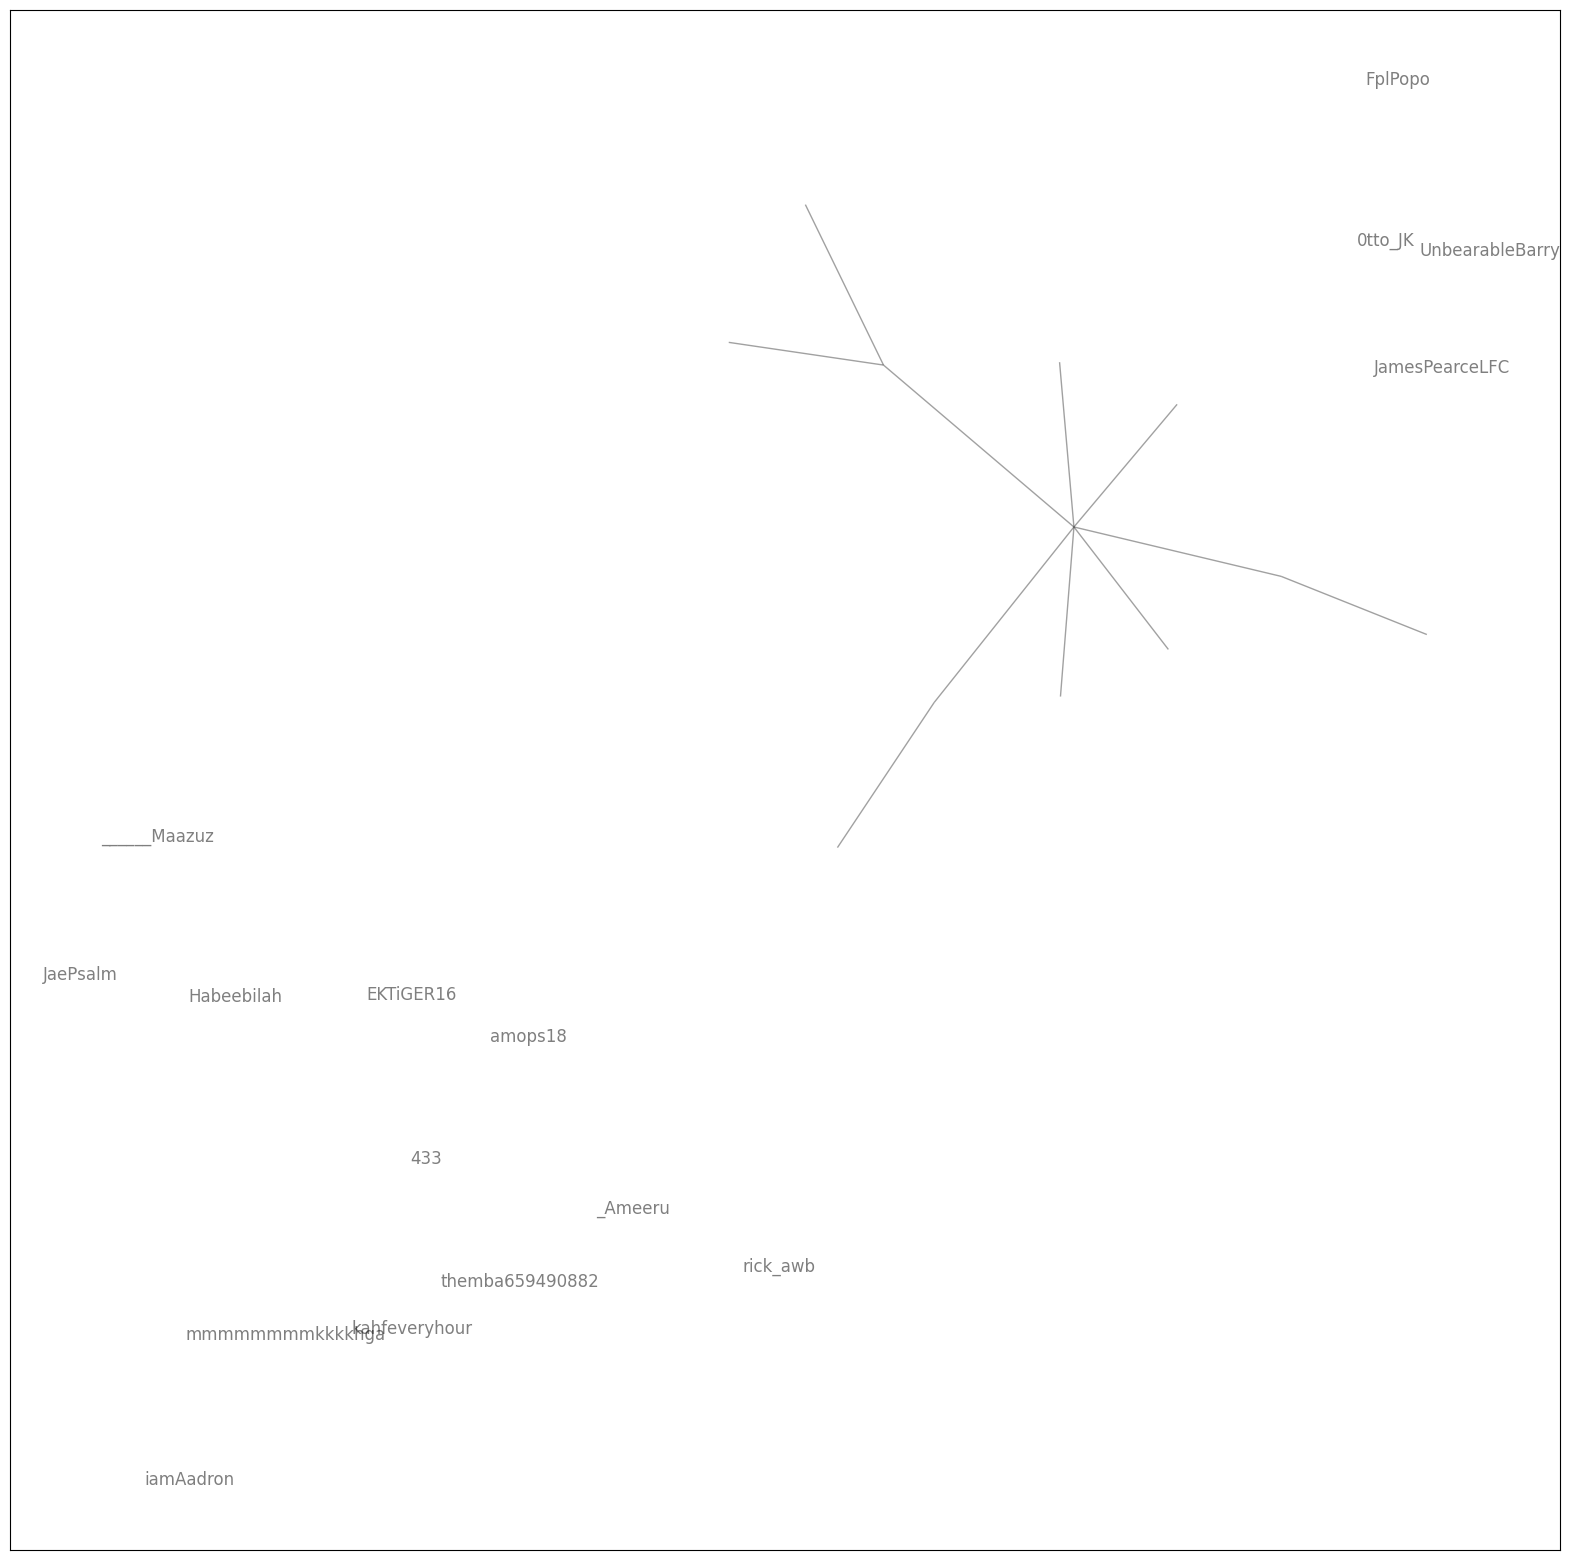

In [29]:
nx.draw_networkx(G_social, pos=pos, node_size=0, edge_color="#444444", alpha=0.5, with_labels=True)

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.karate_club_graph()

# Compute the Spring layout
pos = nx.spring_layout(G)

# Draw the graph with the Spring layout
nx.draw(G, pos, with_labels=True)

# Show the plot
plt.show()

TypeError: '_AxesStack' object is not callable

<Figure size 432x288 with 0 Axes>